# Problem statement

##### Use decision trees to prepare a model on fraud data by treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
import seaborn as sn

# Loading the dataset

In [2]:
fraud = pd.read_csv("Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


We can just peek into few data points by using head function of pandas. By default, head function return top 5 values 

# Data Insights

In [4]:
fraud.shape

(600, 6)

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


##### We could see there are no null values in our dataset.

In [6]:
dups = fraud.duplicated()
print('Number of duplicate rows: %d' % dups.sum())

Number of duplicate rows: 0


##### There are no duplicate values in our dataset

# Summary statistics 

In [7]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Data visualization

##### We will use boxplots and histograms for checking outlier data and understanding the data distribution of the features in our dataset

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='City.Population'>

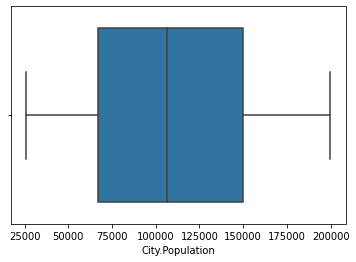

In [8]:
sn.boxplot(fraud['City.Population'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population'>

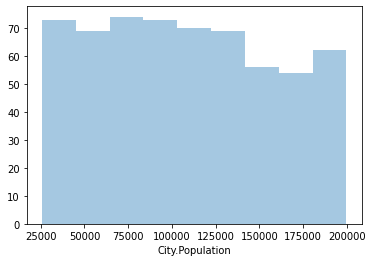

In [9]:
sn.distplot(fraud['City.Population'],kde=False)

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Work.Experience'>

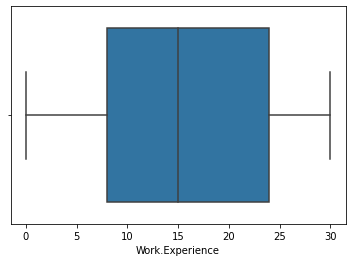

In [10]:
sn.boxplot(fraud['Work.Experience'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Work.Experience'>

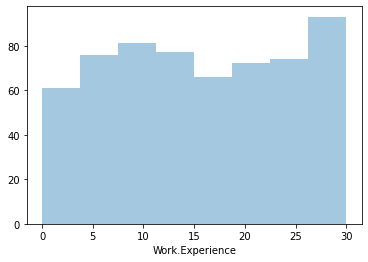

In [11]:
sn.distplot(fraud['Work.Experience'],kde=False)

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Taxable.Income'>

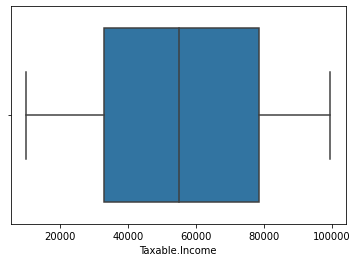

In [12]:
sn.boxplot(fraud['Taxable.Income'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income'>

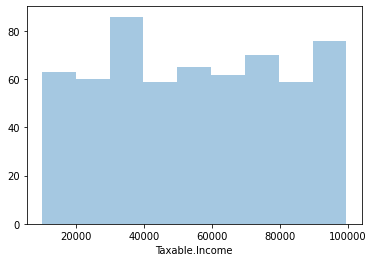

In [13]:
sn.distplot(fraud['Taxable.Income'],kde=False)

# Understanding the target variable

##### Our main objective is to to prepare a model on fraud data by treating those who have taxable_income <= 30000 as "Risky" and others are "Good". So Taxable.Income is our target variable. As Taxable.Income is an int datatype in our dataset, we need to convert it into categorical for our problem statement.

In [14]:
fraud[fraud['Taxable.Income']<=30000].value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         10900           39797            11               NO       1
                           21966           117250           20               YES      1
                           21016           140762           26               NO       1
                           20719           103614           24               NO       1
                                                                                     ..
NO         Single          10150           139642           5                NO       1
           Married         28764           100696           9                YES      1
                           27143           128996           3                YES      1
                           25062           114823           11               NO       1
YES        Single          27394     

In [15]:
fraud[fraud['Taxable.Income']>30000].value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        31409           85128            22               NO       1
YES        Married         35832           190365           28               NO       1
                           40427           168473           9                NO       1
                           39818           148068           13               NO       1
                           39476           57194            25               NO       1
                                                                                     ..
NO         Single          32603           139146           30               YES      1
                           32467           126488           1                YES      1
                           31629           53848            10               NO       1
           Married         98416           31156            13               YES      1
YES        Single          99619     

##### We could see that there are 124 observations with taxable income less than 30,000 and 476 observations with income more than 30000 

In [16]:
fraud['Taxable.Income'].max()

99619

In [17]:
fraud['Taxable.Income'].min()

10003

##### The maximum value is 99619 and minimum value is 10003. We will use cut function of pandas to create bins and divide the taxable_income into 2 categories (<=30000 and >30000)

In [18]:
fraud["Taxable.Income"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [19]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [20]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    category
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
dtypes: category(1), int64(2), object(3)
memory usage: 24.3+ KB


# Using encoding techniques to convert the categorical variables to numeric

In [21]:
def DataFrameImputer(data):
    for col in data.columns:
        if data[col].dtype=='O':
            print(data[col])

DataFrameImputer(fraud)

0       NO
1      YES
2       NO
3      YES
4       NO
      ... 
595    YES
596    YES
597     NO
598    YES
599     NO
Name: Undergrad, Length: 600, dtype: object
0        Single
1      Divorced
2       Married
3        Single
4       Married
         ...   
595    Divorced
596    Divorced
597    Divorced
598     Married
599    Divorced
Name: Marital.Status, Length: 600, dtype: object
0      YES
1      YES
2      YES
3      YES
4       NO
      ... 
595    YES
596    YES
597    YES
598     NO
599     NO
Name: Urban, Length: 600, dtype: object


##### We have 3 columns which are categorical and also our Target variable Taxable.Income is categorical.

In [22]:
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [23]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [24]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [25]:
fraud['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

##### We will use Label encoding technique for ordinal data and one hot encoding technique for nomimal data. The Taxable.Income our target variable is a ordinal data (Good, RIsky) and the other independent features are nominal

In [26]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [27]:
label_encoder = preprocessing.LabelEncoder() 
 
fraud['Taxable.Income']= label_encoder.fit_transform(fraud['Taxable.Income']) 
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0,50047,10,0,0,1,1
1,0,134075,18,1,0,0,1
2,0,160205,30,0,1,0,1
3,0,193264,15,1,0,1,1
4,0,27533,28,0,1,0,0


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

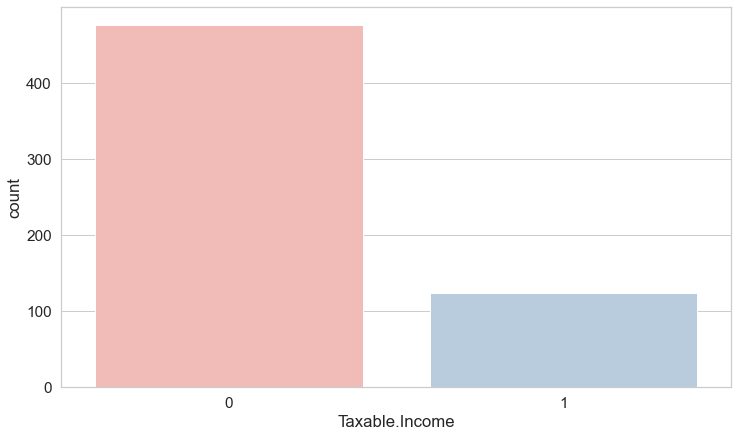

In [28]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'Taxable.Income', data = fraud, palette = 'Pastel1')

##### We can see the value counts of all the Taxable Incomes. We have more number of perople with Taxable Incomes >30,000. The data is imbalanced. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.

# Separating feature data and Label data  and train-test split

In [29]:
X = fraud.drop('Taxable.Income',axis=1)
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [30]:
Y = fraud['Taxable.Income']
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [31]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=30)

In [32]:
X_train.shape

(480, 6)

In [33]:
Y_train.shape

(480,)

In [34]:
X_test.shape

(120, 6)

In [35]:
Y_test.shape

(120,)

# Building Decision Tree classifier using Entropy criteria

In [36]:
model_en_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_en_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Predicting on train data set 

In [37]:
preds_train_dt_en = model_en_dt.predict(X_train) 
pd.Series(preds_train_dt_en).value_counts()

0    479
1      1
dtype: int64

In [38]:
pd.crosstab(Y_train,preds_train_dt_en)

col_0,0,1
Taxable.Income,,
0,384,0
1,95,1


### Predicting on test data set 

In [39]:
preds_test_dt_en  = model_en_dt.predict(X_test) 
pd.Series(preds_test_dt_en).value_counts()

0    119
1      1
dtype: int64

In [40]:
pd.crosstab(Y_test,preds_test_dt_en)

col_0,0,1
Taxable.Income,,
0,91,1
1,28,0


### Checking test accuracy

In [41]:
accuracy = accuracy_score(Y_test,preds_test_dt_en)
print(accuracy)

0.7583333333333333


### Checking train accuracy

In [42]:
accuracy = accuracy_score(Y_train,preds_train_dt_en)
print(accuracy)

0.8020833333333334


##### If we compare the train and test accuracy, we don't have much difference so there is no overfitting problem in our model

In [43]:
print(classification_report(Y_test,preds_test_dt_en))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



##### From the above confusion matrix, we can see that the model is biased and predicting Taxable.Income as Good correctly but it is not able to predict Risky (<=30000). We will balance our data using oversampling and then build our model

# Using Over Sampling for balancing the data

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'not majority', random_state = 42)

In [45]:
x_resample, y_resample = sm.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [46]:
y_df.value_counts()

Taxable.Income
0                 476
1                 476
dtype: int64

##### We could see the data is resampled now and count of both Good and Risky values are 476  now. We will split the resampled data into training and test data and build a Decision Tree model 

In [47]:
x_resample

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
947,131067,16,0,0,0,1
948,102459,18,0,0,1,0
949,124986,18,0,0,1,1
950,91873,15,0,0,0,0


In [48]:
y_resample

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    1
950    1
951    1
Name: Taxable.Income, Length: 952, dtype: int32

In [49]:
X_train, X_test,Y_train,Y_test = train_test_split(x_resample,y_resample, test_size=0.2,random_state=30)

##### We will apply Normalization to make the scale free and to make data  consistent

In [50]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [51]:
X_train_norm

array([[0.28936373, 0.1       , 0.        , 0.        , 1.        ,
        0.        ],
       [0.59417008, 0.36666667, 1.        , 1.        , 0.        ,
        0.        ],
       [0.11766734, 0.63333333, 0.        , 1.        , 0.        ,
        0.        ],
       ...,
       [0.64855545, 0.23333333, 0.        , 0.        , 0.        ,
        0.        ],
       [0.62877373, 0.43333333, 1.        , 0.        , 1.        ,
        0.        ],
       [0.29401893, 0.46666667, 1.        , 0.        , 0.        ,
        1.        ]])

In [52]:
print(X_train_norm.shape)

(761, 6)


In [53]:
X_test_norm

array([[0.28627176, 0.46666667, 1.        , 0.        , 0.        ,
        1.        ],
       [0.92015471, 0.13333333, 1.        , 0.        , 0.        ,
        0.        ],
       [0.06473026, 0.56666667, 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.92218921, 0.83333333, 1.        , 0.        , 1.        ,
        1.        ],
       [0.64277956, 0.06666667, 0.        , 0.        , 1.        ,
        1.        ],
       [0.17205846, 0.83333333, 0.        , 1.        , 0.        ,
        1.        ]])

In [54]:
print(X_test_norm.shape)

(191, 6)


In [55]:
Y_train

803    1
76     0
411    0
618    1
237    1
      ..
500    0
813    1
941    1
421    0
805    1
Name: Taxable.Income, Length: 761, dtype: int32

In [56]:
Y_test

745    1
704    1
749    1
521    0
310    0
      ..
61     1
644    1
209    0
585    0
224    0
Name: Taxable.Income, Length: 191, dtype: int32

# Building Decision tree classifier on Balanced data

In [57]:
model_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Predicting on train data set 

In [58]:
preds_train_dt = model_dt.predict(X_train_norm) 
pd.Series(preds_train_dt).value_counts()

1    432
0    329
dtype: int64

In [59]:
pd.crosstab(Y_train,preds_train_dt)

col_0,0,1
Taxable.Income,,
0,229,149
1,100,283


### Predicting on test data set 

In [60]:
preds_test_dt  = model_dt.predict(X_test_norm) 
pd.Series(preds_test_dt).value_counts()

1    100
0     91
dtype: int64

In [61]:
pd.crosstab(Y_test,preds_test_dt)

col_0,0,1
Taxable.Income,,
0,60,38
1,31,62


### Checking test accuracy

In [62]:
accuracy = accuracy_score(Y_test,preds_test_dt)
print(accuracy)

0.6387434554973822


### Checking train accuracy

In [63]:
accuracy = accuracy_score(Y_train,preds_train_dt)
print(accuracy)

0.6727989487516426


In [64]:
print(classification_report(Y_test,preds_test_dt))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63        98
           1       0.62      0.67      0.64        93

    accuracy                           0.64       191
   macro avg       0.64      0.64      0.64       191
weighted avg       0.64      0.64      0.64       191



##### After balancing the data with oversampling, we can see that the accuracy of the model is reduced, but the precision,recall and f1-scores are much better than earlier. 

##### As we have very less features,we need more features for better prediction and accuracy

# Using Random Forest classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest_new = RandomForestClassifier(n_estimators=140,max_depth=5,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(X_train_norm, Y_train)

RandomForestClassifier(max_depth=5, min_samples_split=20, n_estimators=140)

### Predicting on train data set 

In [66]:
pred_rf_train = forest_new.predict(X_train_norm) # predicting on train data set 
pd.Series(pred_rf_train).value_counts()

1    398
0    363
dtype: int64

In [67]:
pd.crosstab(Y_train,pred_rf_train)

col_0,0,1
Taxable.Income,,
0,272,106
1,91,292


### Predicting on test data set 

In [68]:
pred_rf_test  = forest_new.predict(X_test_norm) 
pd.Series(pred_rf_test).value_counts()

0    104
1     87
dtype: int64

In [69]:
pd.crosstab(Y_test,pred_rf_test)

col_0,0,1
Taxable.Income,,
0,69,29
1,35,58


### Checking test accuracy

In [70]:
accuracy = accuracy_score(Y_test,pred_rf_test)
print(accuracy)

0.6649214659685864


### Checking train accuracy

In [71]:
accuracy = accuracy_score(Y_train,pred_rf_train)
print(accuracy)

0.7411300919842313


In [72]:
print(classification_report(Y_test,pred_rf_test))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        98
           1       0.67      0.62      0.64        93

    accuracy                           0.66       191
   macro avg       0.67      0.66      0.66       191
weighted avg       0.67      0.66      0.66       191



##### After balancing the data with oversampling, we can see that the accuracy of the model is reduced, but the precision,recall and f1-scores are much better than earlier. 

##### As we have very less features,we need more features for better prediction and accuracy

# Using XGBoost classifier

In [73]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=4,n_estimators=200)
xgb_model.fit(X_train_norm, Y_train)

# make predictions for test data
y_pred_xgb = xgb_model.predict(X_test_norm)



accuracy = accuracy_score(Y_test,y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\91982\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 76.96%


In [74]:
print(classification_report(Y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        98
           1       0.77      0.75      0.76        93

    accuracy                           0.77       191
   macro avg       0.77      0.77      0.77       191
weighted avg       0.77      0.77      0.77       191



##### Using XGBoost ensembling technique we can see the accuracy is boosted and the model predicts both Risky and Good categories correctly.